In [67]:
# Importing the pandas library for data manipulation and analysis.
# Pandas is particularly useful for handling structured data in the form of dataframes.
import pandas as pd

# Importing the numpy library, which is essential for numerical operations.
# Numpy is used for working with arrays and performing mathematical computations efficiently.
import numpy as np

# Importing seaborn, a data visualization library based on Matplotlib.
# Seaborn makes it easier to create attractive and informative statistical graphics.
import seaborn as sns

# Importing Matplotlib's pyplot module for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# Configuring Matplotlib to display plots inline within a Jupyter Notebook.
# The `%matplotlib inline` magic command ensures that visualizations are rendered directly in the notebook.
%matplotlib inline


In [68]:
# Loading the training dataset into a pandas DataFrame.
# The `pd.read_csv()` function reads a CSV (Comma Separated Values) file and converts it into a DataFrame for easier manipulation.
# '/content/train.csv' is the file path to the training dataset.
train_data = pd.read_csv('/content/train.csv')

# Loading the testing dataset into a pandas DataFrame.
# This dataset is likely used for model evaluation or prediction once the model is trained.
# '/content/test.csv' is the file path to the testing dataset.
test_data = pd.read_csv('/content/test.csv')


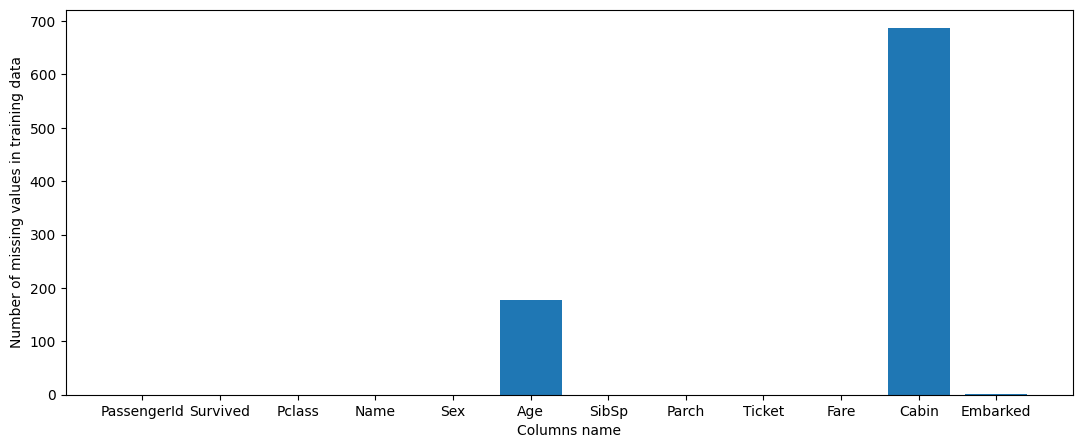

In [69]:
# Creating a new figure for the plot with a specified size (width=13, height=5).
# This helps ensure the plot is large enough for better readability, especially when there are many columns.
plt.figure(figsize=(13, 5))

# Creating a bar plot to visualize the number of missing values for each column in the training dataset.
# `train_data.columns` provides the names of the columns, which will serve as the x-axis labels.
# `train_data.isna().sum()` calculates the total number of missing (NaN) values for each column, used as the y-axis values.
plt.bar(train_data.columns, train_data.isna().sum())

# Adding a label to the x-axis to describe what it represents.
plt.xlabel("Columns name")

# Adding a label to the y-axis to describe the count of missing values in each column.
plt.ylabel("Number of missing values in training data")

# Displaying the bar plot. This renders the visualization inline in the Jupyter Notebook.
plt.show()


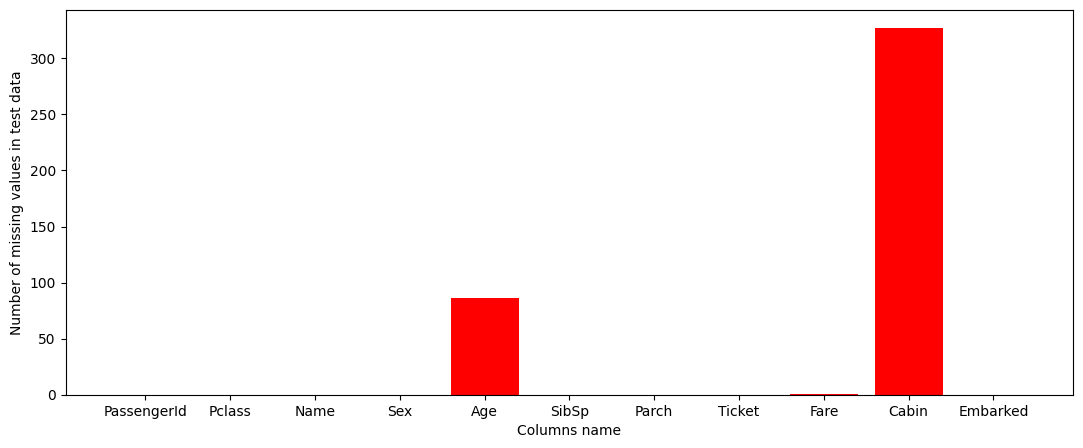

In [70]:
# Creating a new figure for the plot with a specified size (width=13, height=5).
# This ensures the plot has adequate space for better readability.
plt.figure(figsize=(13, 5))

# Creating a bar plot to visualize the number of missing values for each column in the testing dataset.
# `test_data.columns` provides the column names for the x-axis.
# `test_data.isnull().sum().values` calculates the total number of missing (null) values for each column and provides them as an array for the y-axis.
# The `color='red'` argument changes the bar color to red for emphasis or distinction from other plots.
plt.bar(test_data.columns, test_data.isnull().sum().values, color='red')

# Adding a label to the x-axis to describe what it represents.
plt.xlabel("Columns name")

# Adding a label to the y-axis to describe the count of missing values in each column.
plt.ylabel("Number of missing values in test data")

# Displaying the bar plot inline in the notebook.
plt.show()


In [44]:
# before filling the missing values, let's drop Cabin column from both data.
train_data.drop('Cabin', axis = 1, inplace = True)
test_data.drop('Cabin', axis = 1, inplace = True)

In [71]:
# Combining the training and testing datasets into a list for iterative processing.
# This is useful when you want to apply the same operations to both datasets.
combined_data = [train_data, test_data]

# Iterating through each dataset (training and testing) in the combined_data list.
for data in combined_data:
    # Printing the count of missing values (NaN) for each column in the current dataset.
    # `isnull().sum()` calculates the total number of missing values per column.
    print(data.isnull().sum())

    # Printing a separator of 20 asterisks ('*') for better readability between outputs of the two datasets.
    print('*' * 20)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
********************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
********************


In [46]:
# filling the nan values fo Age and fare column with the mean while Embarked column with most_frequent value
for data in combined_data:
    data.Age.fillna(data.Age.mean(), inplace = True)
    data.Fare.fillna(data.Fare.mean(), inplace = True)

# from visualization we know that Southamptom is most frequent Embarked place so, filling the missing value
# with 'S'
train_data.Embarked.fillna('S', inplace = True)

# we simply can use SimpleImputer class form the sklearn to deal with the missing value
# from sklearn.impute import SimpleImputer
# impute = SimpleImputer(missing_values = np.nan, strategy = 'mean')
# train_data[['Age']] = impute.fit_transform(train_data[['Age']])


In [47]:
def change_gender(x):
    if x == 'male':
        return 0
    elif x == 'female':
        return 1
train_data.Sex = train_data.Sex.apply(change_gender)
test_data.Sex = test_data.Sex.apply(change_gender)
# we simply can use mapfunction to change the gender
# train_data.Sex = train_data.Sex.map({'female':1, 'male':0})

In [48]:
change = {'S':1,'C':2,'Q':0}
train_data.Embarked = train_data.Embarked.map(change)
test_data.Embarked = test_data.Embarked.map(change)


In [49]:
train_data['Alone'] = train_data.SibSp + train_data.Parch
test_data['Alone'] = test_data.SibSp + test_data.Parch

train_data.Alone = train_data.Alone.apply(lambda x: 1 if x == 0 else 0)
test_data.Alone = test_data.Alone.apply(lambda x: 1 if x == 0 else 0)


In [50]:
# now lets drop SibSp and Parch column for both training and testing data
train_data.drop(['SibSp','Parch'], axis = 1, inplace = True)
test_data.drop(['SibSp','Parch'], axis = 1, inplace = True )


In [51]:
train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False).unique().size
# there are total 17 unique title


17

In [52]:
# lets create the Title feature which contain the title of the passenger and drop Name column
for data in combined_data:
    data['Title'] = data.Name.str.extract('([A-Za-z]+)\.', expand = False)
    data.drop('Name', axis = 1, inplace = True)



In [53]:
#lets replace least occuring title in the data with rare
least_occuring = [ 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess','Dona',
       'Jonkheer']
for data in combined_data:
    data.Title = data.Title.replace(least_occuring, 'Rare')

In [54]:
# lets perform title mapping in order to change to ordinal
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for data in combined_data:
    data['Title'] = data['Title'].map(title_mapping)

In [55]:
columns_to_drop = ['PassengerId','Ticket']
train_data.drop(columns_to_drop, axis = 1, inplace = True)
test_data.drop(columns_to_drop[1], axis = 1, inplace = True)


In [56]:
for dataset in combined_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4


In [57]:
for data in combined_data:
    data.loc[data['Fare'] < 30, 'Fare'] = 1
    data.loc[(data['Fare'] >= 30) & (data['Fare'] < 50),'Fare'] = 2
    data.loc[(data['Fare'] >= 50) & (data['Fare'] < 100),'Fare'] = 3
    data.loc[(data['Fare'] >= 100),'Fare'] = 4


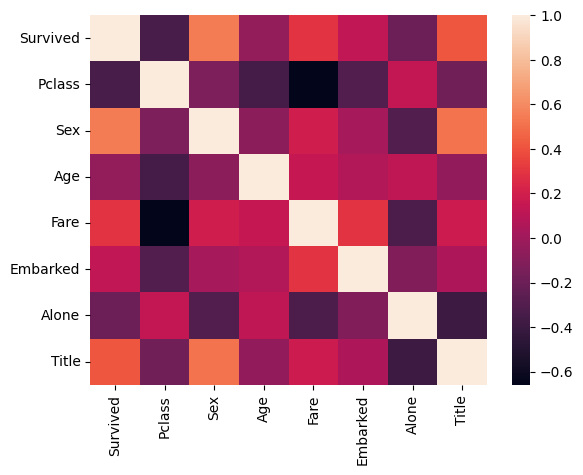

In [58]:
corr_train = train_data.corr()
sns.heatmap(corr_train)
plt.show()


In [59]:
X_train = train_data.drop("Survived", axis=1)
Y_train = train_data["Survived"]
X_test = test_data.drop("PassengerId", axis = 1)
print("shape of X_train",X_train.shape)
print("Shape of Y_train",Y_train.shape)
print("Shape of x_test",X_test.shape)


shape of X_train (891, 7)
Shape of Y_train (891,)
Shape of x_test (418, 7)


In [60]:
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential


In [61]:
model = Sequential()
model.add(Dense(units = 32, input_shape = (7,), activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu', kernel_initializer = 'he_normal', use_bias = False))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(units = 128, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 64, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dropout(0.1))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(units = 16, activation = 'relu'))
model.add(Dense(units = 8, activation = 'relu',kernel_initializer = 'he_normal', use_bias = False))
model.add(Dense(units =1 , activation = 'sigmoid'))

In [62]:
model.compile(loss = tf.keras.losses.binary_crossentropy, optimizer = tf.keras.optimizers.Adam(), metrics = ['acc'])
model.fit(X_train, Y_train, batch_size = 32, verbose = 2, epochs = 50)


Epoch 1/50
28/28 - 3s - 119ms/step - acc: 0.7138 - loss: 0.5600
Epoch 2/50
28/28 - 0s - 5ms/step - acc: 0.7991 - loss: 0.4602
Epoch 3/50
28/28 - 0s - 5ms/step - acc: 0.7823 - loss: 0.4570
Epoch 4/50
28/28 - 0s - 5ms/step - acc: 0.8092 - loss: 0.4292
Epoch 5/50
28/28 - 0s - 5ms/step - acc: 0.8137 - loss: 0.4222
Epoch 6/50
28/28 - 0s - 6ms/step - acc: 0.8114 - loss: 0.4286
Epoch 7/50
28/28 - 0s - 6ms/step - acc: 0.8215 - loss: 0.4082
Epoch 8/50
28/28 - 0s - 10ms/step - acc: 0.8204 - loss: 0.4089
Epoch 9/50
28/28 - 0s - 5ms/step - acc: 0.8249 - loss: 0.4033
Epoch 10/50
28/28 - 0s - 11ms/step - acc: 0.8238 - loss: 0.3949
Epoch 11/50
28/28 - 0s - 12ms/step - acc: 0.8339 - loss: 0.3955
Epoch 12/50
28/28 - 0s - 8ms/step - acc: 0.8227 - loss: 0.3859
Epoch 13/50
28/28 - 0s - 5ms/step - acc: 0.8272 - loss: 0.3826
Epoch 14/50
28/28 - 0s - 3ms/step - acc: 0.8384 - loss: 0.3810
Epoch 15/50
28/28 - 0s - 5ms/step - acc: 0.8238 - loss: 0.3776
Epoch 16/50
28/28 - 0s - 5ms/step - acc: 0.8350 - loss: 0.3

In [63]:
predict = model.predict(X_test)
#since we have use sigmoid activation function in output layer
predict = (predict > 0.5).astype(int).ravel()
print(predict)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
[0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 1]


In [64]:
submit = pd.DataFrame({"PassengerId":test_data.PassengerId, 'Survived':predict})
submit.to_csv("/content/Final_submission.csv",index = False)

In [65]:
from sklearn import metrics
Y_pred_rand = (model.predict(X_train) > 0.5).astype(int)
print('Precision : ', np.round(metrics.precision_score(Y_train, Y_pred_rand)*100,2))
print('Accuracy : ', np.round(metrics.accuracy_score(Y_train, Y_pred_rand)*100,2))
print('Recall : ', np.round(metrics.recall_score(Y_train, Y_pred_rand)*100,2))
print('F1 score : ', np.round(metrics.f1_score(Y_train, Y_pred_rand)*100,2))
print('AUC : ', np.round(metrics.roc_auc_score(Y_train, Y_pred_rand)*100,2))

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Precision :  79.36
Accuracy :  84.29
Recall :  79.82
F1 score :  79.59
AUC :  83.45


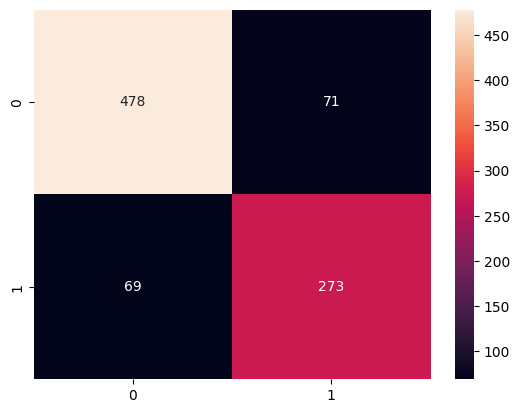

In [66]:
# plotting the confusion matrix in heatmap
matrix = metrics.confusion_matrix(Y_train, Y_pred_rand)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()